In [18]:
from helper import *
from sklearn.metrics import rand_score
df = pd.read_csv("simulation_data_cluster_3_region_2_read_depth_100_replica_2.tsv", sep="\t")
change_df_to_pyclonevi(df)
!pyclone-vi fit -i pyclonevi_input.tsv -o pyclonevi_intemediate_output.h5 -c 40 -d beta-binomial -r 10
!pyclone-vi write-results-file -i pyclonevi_intemediate_output.h5 -o pyclonevi_output.tsv
df = pd.read_csv("pyclonevi_output.tsv", sep="\t")
mutation_to_cluster = df.set_index('mutation_id')['cluster_id'].to_dict()
mutation_to_cluster = dict(sorted(mutation_to_cluster.items()))
df = pd.read_csv("simulation_data_cluster_3_region_2_read_depth_100_replica_2.tsv", sep="\t")
mutation_to_cluster2 = df.set_index('mutation')['cluster'].to_dict()
mutation_to_cluster2 = dict(sorted(mutation_to_cluster2.items()))
from sklearn.metrics import adjusted_rand_score
rand_score(list(mutation_to_cluster.values()), list(mutation_to_cluster2.values()))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.

Num Samples: 2
Samples: R1 R2
Num mutations: 100
Performing restart 0
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -19726.342174074154
Number of clusters used: 38

Fitting completed
ELBO: -768.717806522969
Number of clusters used: 2

Performing restart 1
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -22895.639221739304
Number of clusters used: 33

Fitting completed
ELBO: -712.3146176415488
Number of clusters used: 3

Performing restart 2
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -19283.29460565325
Number of clusters used: 37

Fitting completed
ELBO: -959.6140146072869
Number of clusters used: 2

Performing restart 3
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -16174.868955662707
Number of clusters used: 34

Fitting completed
ELBO: -712.3146053617538
Number of clusters used: 3

Performing restart 4
Setting annealing factor to : 1.0

Iteration: 0
ELBO: 

0.9721212121212122

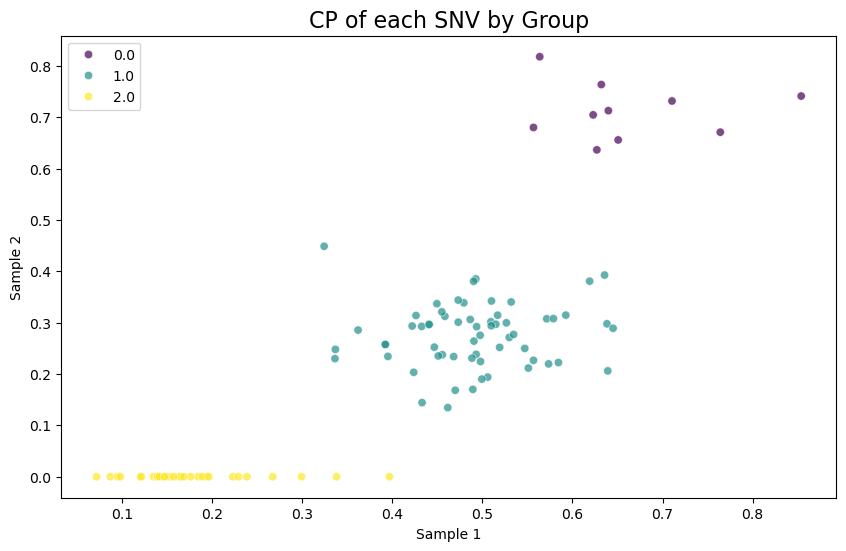

In [19]:
from helper import *
df = pd.read_csv("simulation_data_cluster_3_region_2_read_depth_100_replica_2.tsv", sep="\t")
m = len(np.unique(df['region']))
n = int(len(df) / m)
c_mat = get_c_mat(df)
cparr = np.zeros([n, m])
group = np.zeros(n)
cp = df['tumour_purity'] * df['alt_counts'] * (df['tumour_purity'] * (df['major_cn'] + df['minor_cn']) + 2 * (1 - df['tumour_purity'])) / ((df['ref_counts'] + df['alt_counts']) * df['tumour_purity'] * df['multiplicity'])

for i in range(n):
    group[i] = int(df['cluster'][i * m])
    for j in range(m):
        cparr[i, j] = cp[i * m + j]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cparr[:, 0], y=cparr[:, 1], hue=group, palette='viridis', alpha=0.7)

# Add labels and title
plt.title("CP of each SNV by Group", fontsize=16)
plt.xlabel("Sample 1")
plt.ylabel("Sample 2")

# Show the plot
plt.show()

In [15]:
from snv2 import *
import pandas as pd
df = pd.read_csv("simulation_data_cluster_3_region_2_read_depth_100_replica_2.tsv", sep="\t")
m = len(np.unique(df['region']))
n = int(len(df) / m)
rho = 0.2
omega = 1
max_iteration = 20
gamma = [0.1+ 0.002 * i for i in range(14)]
ray.shutdown()
ray.init()
res = [ADMM.remote(df, rho, gamma[i], omega, n, m, max_iteration) for i in range(len(gamma))]
res = ray.get(res)
ray.shutdown()

group = np.zeros(n)
for i in range(n):
    group[i] = int(df['cluster'][i * m])
for i in range(len(gamma)):
    acc = adjusted_rand_score(res[i][7], group)
    print(f"lambda = {round(gamma[i], 5)}, accuracy = {round(acc, 4)}")

2024-12-14 22:43:00,883	INFO worker.py:1786 -- Started a local Ray instance.


(ADMM pid=91417) Gamma: 0.112, clusters : dict_values([0, 1, 2, 3, 4, 5, 2, 2, 8, 9, 10, 11, 2, 13, 14, 15, 10, 17, 18, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 18, 31, 32, 23, 18, 35, 36, 37, 38, 39, 40, 41, 42, 43, 2, 2, 46, 47, 48, 49, 50, 51, 18, 53, 54, 55, 56, 18, 58, 25, 2, 61, 13, 13, 18, 13, 66, 67, 13, 53, 70, 71, 67, 73, 74, 75, 13, 77, 40, 79, 13, 81, 67, 83, 67, 85, 86, 73, 26, 89, 90, 91, 25, 67, 94, 53, 96, 43, 98, 2])
(ADMM pid=91416) Gamma: 0.10600000000000001, clusters : dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 7, 13, 14, 15, 10, 17, 18, 7, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 18, 31, 32, 23, 18, 35, 36, 37, 38, 39, 40, 41, 42, 43, 7, 7, 46, 47, 48, 49, 50, 51, 18, 53, 54, 55, 56, 18, 58, 59, 7, 61, 13, 18, 18, 18, 66, 67, 18, 53, 70, 71, 67, 73, 74, 75, 18, 77, 40, 79, 13, 81, 13, 83, 13, 85, 86, 73, 26, 89, 90, 91, 59, 18, 94, 53, 96, 43, 98, 99]) [repeated 12x across cluster]
lambda = 0.1, accuracy = 0.0384
lambda = 0.102, accuracy = 0.0384
lambda = 

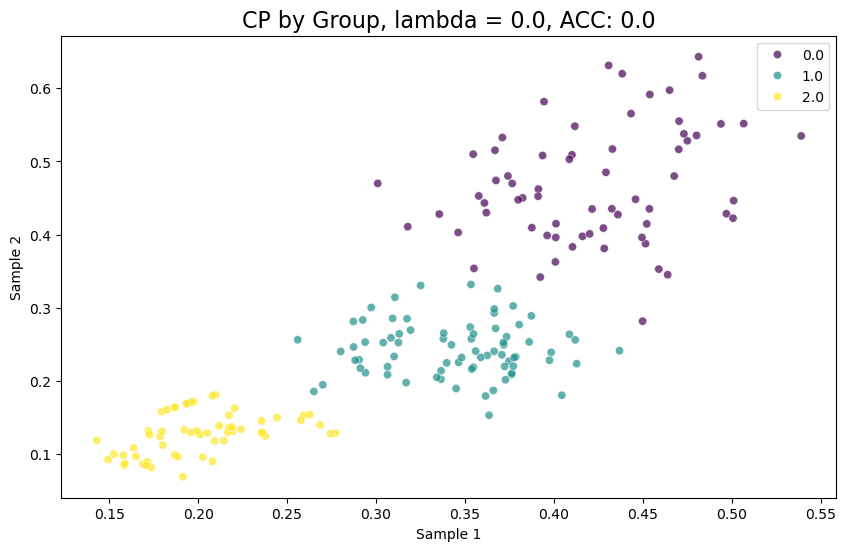

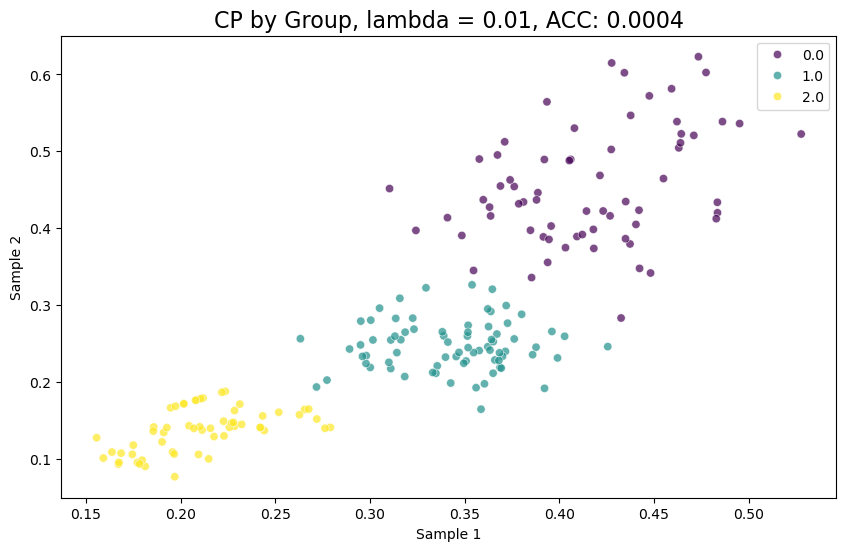

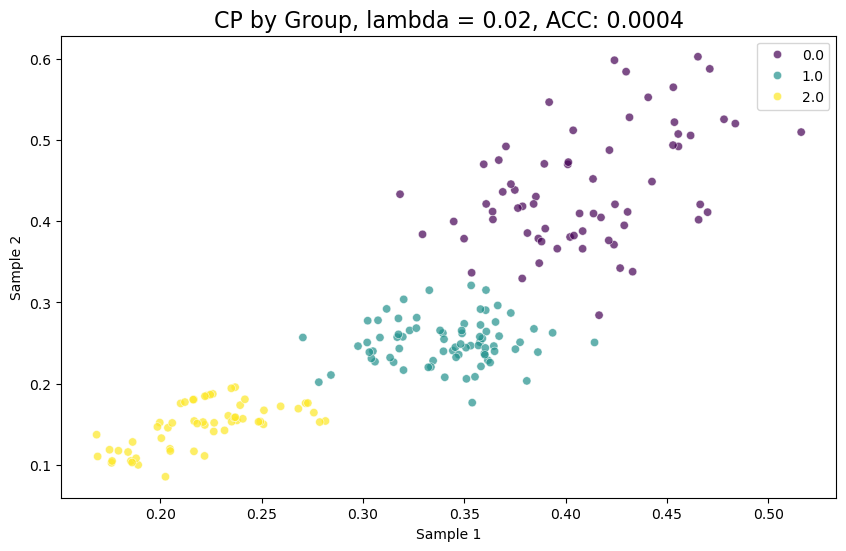

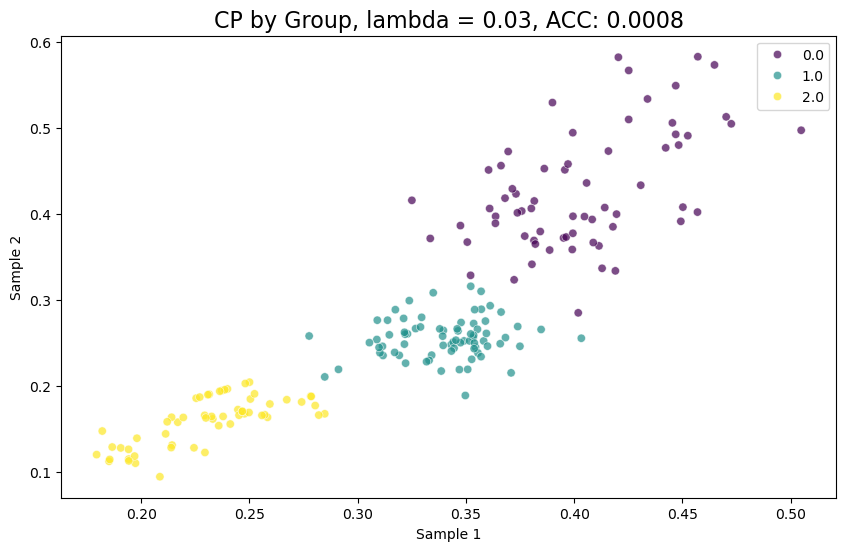

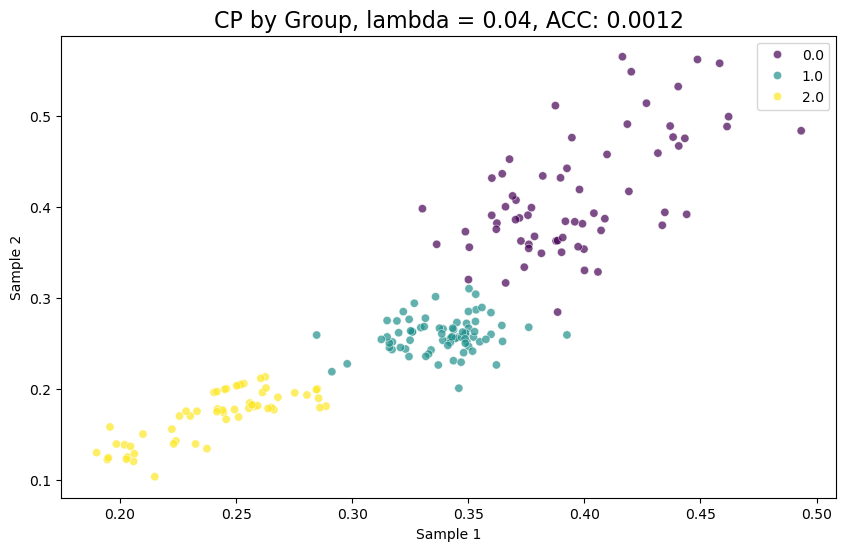

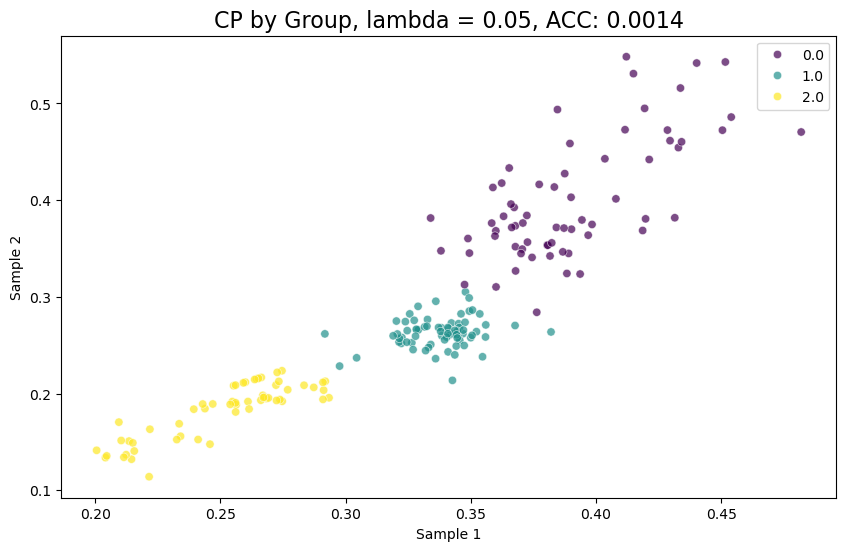

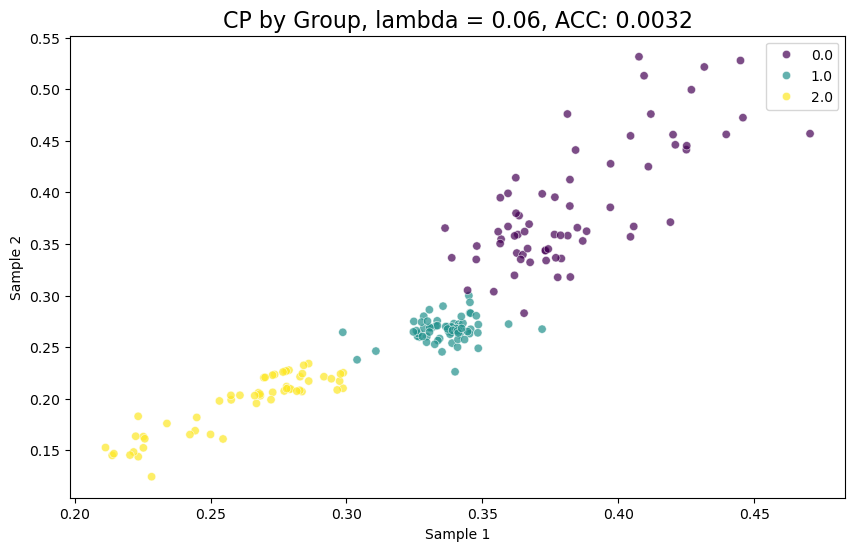

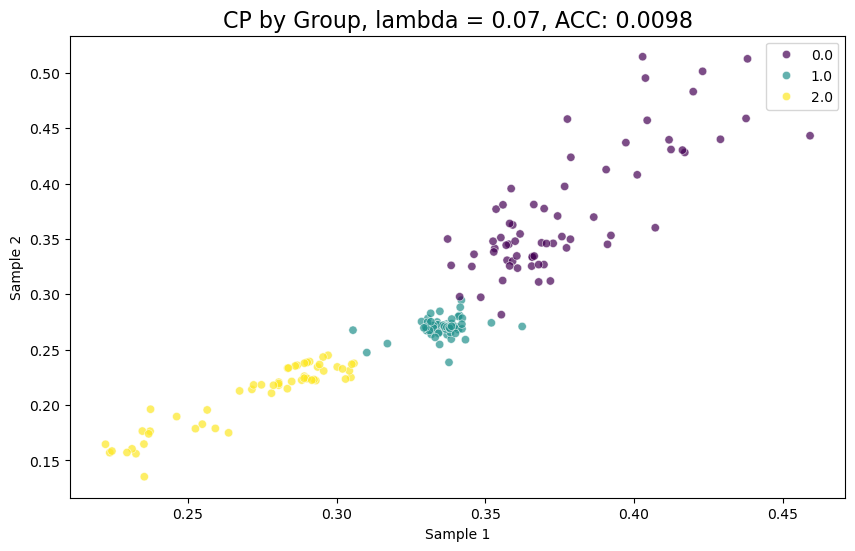

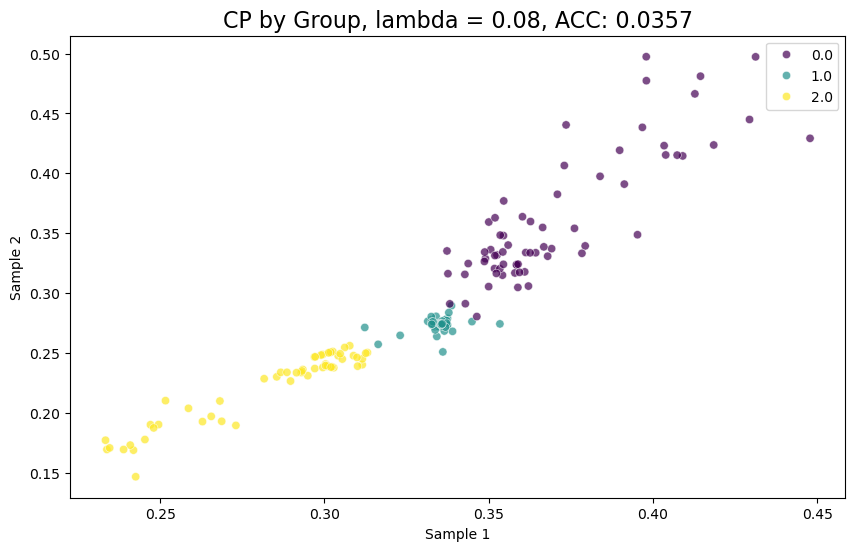

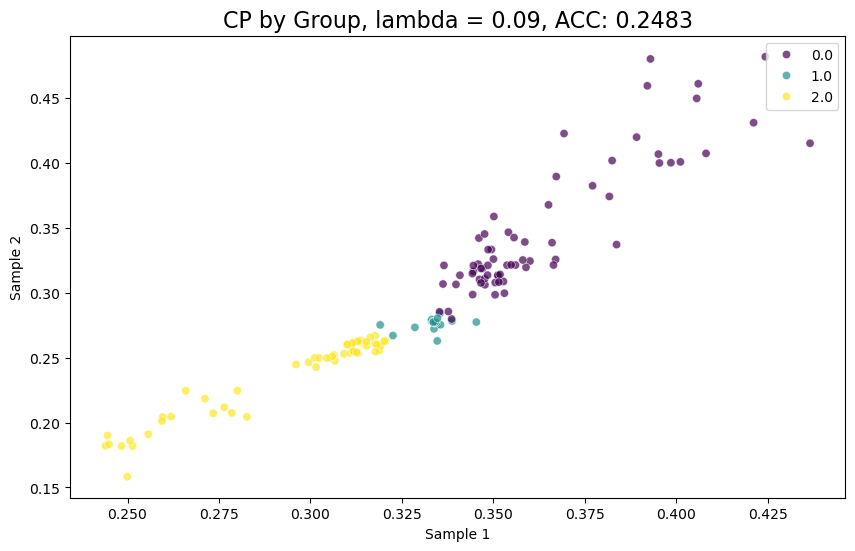

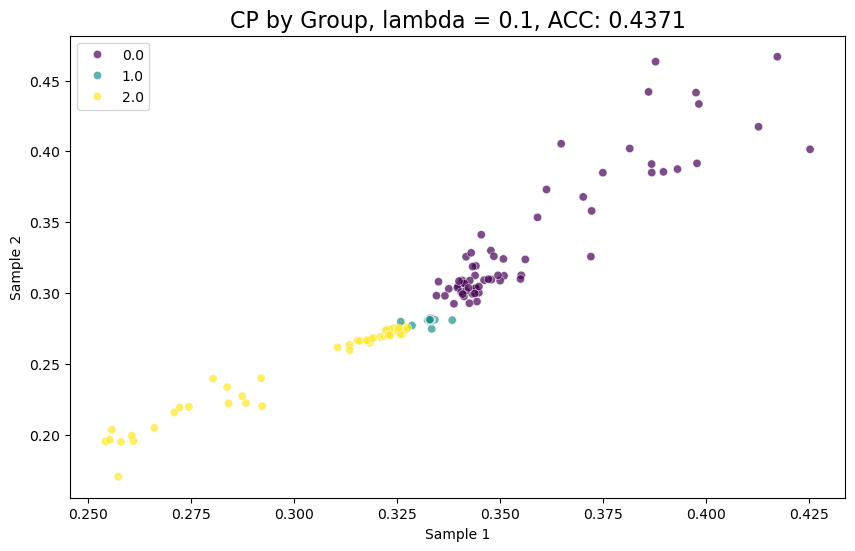

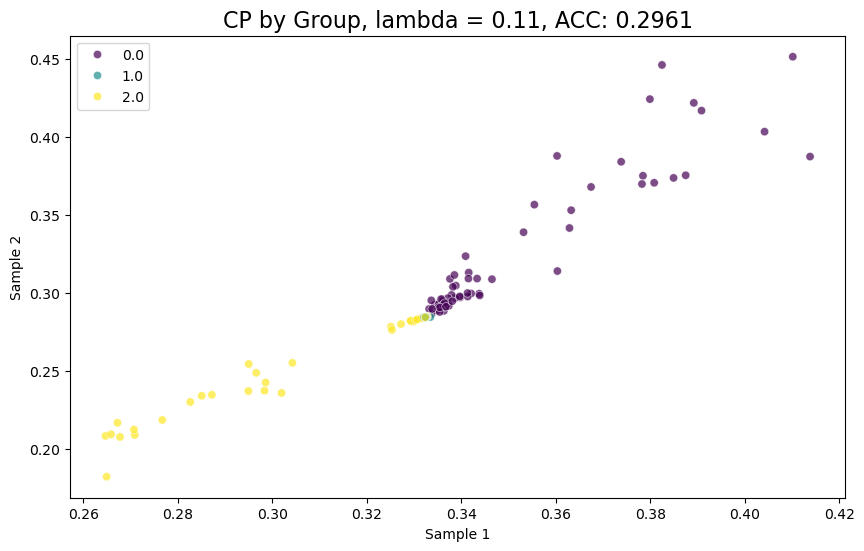

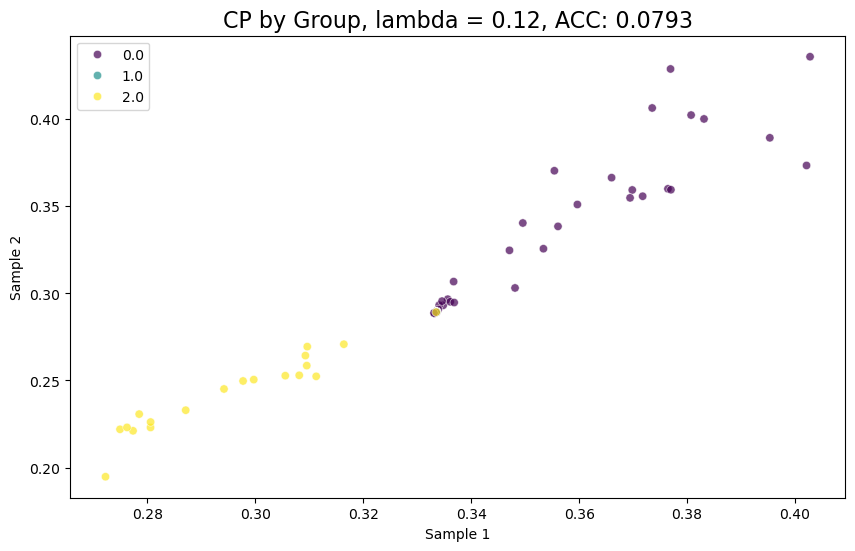

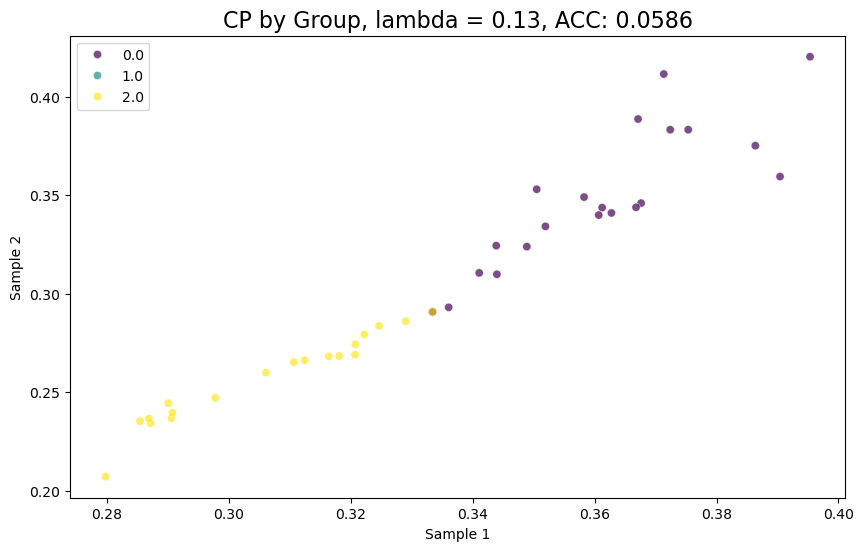

In [3]:
from helper import *
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, rand_score
group = np.zeros(n)
for i in range(n):
    group[i] = int(df['cluster'][i * m])
for i in range(len(gamma)):
    cp = convert_p_to_cp(res[i][0], n, m)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cp[:, 0], y=cp[:, 1], hue=group, palette='viridis', alpha=0.7)

    # Add labels and title
    plt.title(f"CP by Group, lambda = {round(gamma[i], 4)}, ACC: {round(adjusted_rand_score(res[i][7], group), 4)}", fontsize=16)
    plt.xlabel("Sample 1")
    plt.ylabel("Sample 2")

    # Show the plot
    plt.savefig(f"example_{i}.png", dpi=300, bbox_inches="tight")

In [11]:
def create_gif(image_sequence, output_file, duration=10):
    """
    Generate a GIF from a sequence of images.

    Parameters:
        image_sequence (list of str): Paths to the image files in sequence.
        output_file (str): Path for the output GIF file.
        duration (float): Duration of each frame in seconds (default is 0.5s).
    """
    with imageio.get_writer(output_file, mode='I', duration=duration) as writer:
        for image_path in image_sequence:
            image = imageio.imread(image_path)
            writer.append_data(image)
    print(f"GIF saved as {output_file}")

image_sequence = [f"example_{i}.png" for i in range(len(gamma))]  # Replace with your image paths
output_gif = "output.gif"
create_gif(image_sequence, output_gif, duration=100)

GIF saved as output.gif


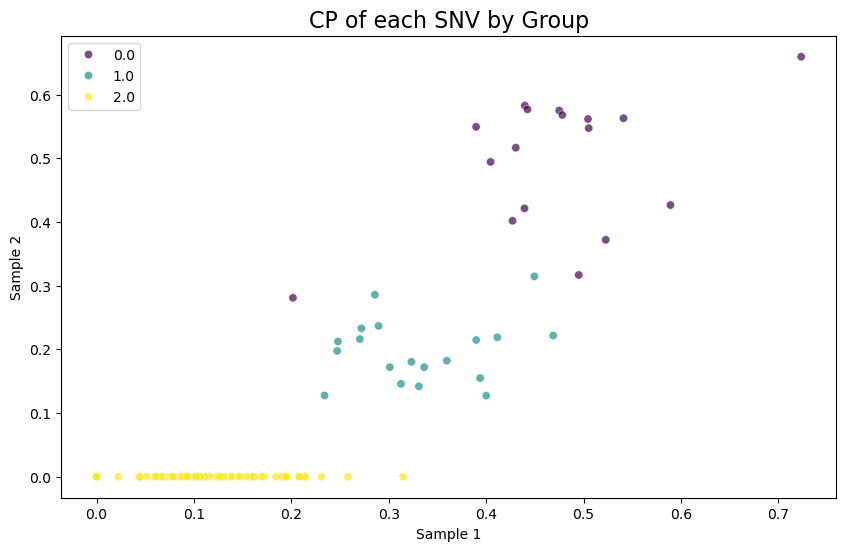

In [13]:
from helper import *
c_mat = get_c_mat(df)
cp1 = convert_p_to_cp(res[0][0], n, m)
cparr = np.zeros([n, m])
group = np.zeros(n)
cp = df['tumour_purity'] * df['alt_counts'] * (df['tumour_purity'] * (df['major_cn'] + df['minor_cn']) + 2 * (1 - df['tumour_purity'])) / ((df['ref_counts'] + df['alt_counts']) * df['tumour_purity'] * df['multiplicity'])

for i in range(n):
    group[i] = int(df['cluster'][i * m])
    for j in range(m):
        cparr[i, j] = cp[i * m + j]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cparr[:, 0], y=cparr[:, 1], hue=group, palette='viridis', alpha=0.7)

# Add labels and title
plt.title("CP of each SNV by Group", fontsize=16)
plt.xlabel("Sample 1")
plt.ylabel("Sample 2")

# Show the plot
plt.show()

In [4]:
from helper import *
c_mat = get_c_mat(df)
cp1 = convert_p_to_cp(res[0][0], n, m)
cparr = np.zeros([n, m])
group = np.zeros(n)
cp = df['tumour_purity'] * df['alt_counts'] * (df['tumour_purity'] * (df['major_cn'] + df['minor_cn']) + 2 * (1 - df['tumour_purity'])) / ((df['ref_counts'] + df['alt_counts']) * df['tumour_purity'] * df['multiplicity'])

for i in range(n):
    group[i] = int(df['cluster'][i * m])
    for j in range(m):
        cparr[i, j] = cp[i * m + j]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cparr[:, 0], y=cparr[:, 1], hue=group, palette='viridis', alpha=0.7)

# Add labels and title
plt.title("CP of each SNV by Group", fontsize=16)
plt.xlabel("Sample 1")
plt.ylabel("Sample 2")

# Show the plot
plt.show()

NameError: name 'df' is not defined

In [16]:
from helper import *
df = pd.read_csv('simulation_data_cluster_5_region_2_read_depth_100_replica_2.tsv', sep='\t')
get_file_for_clipp(df)

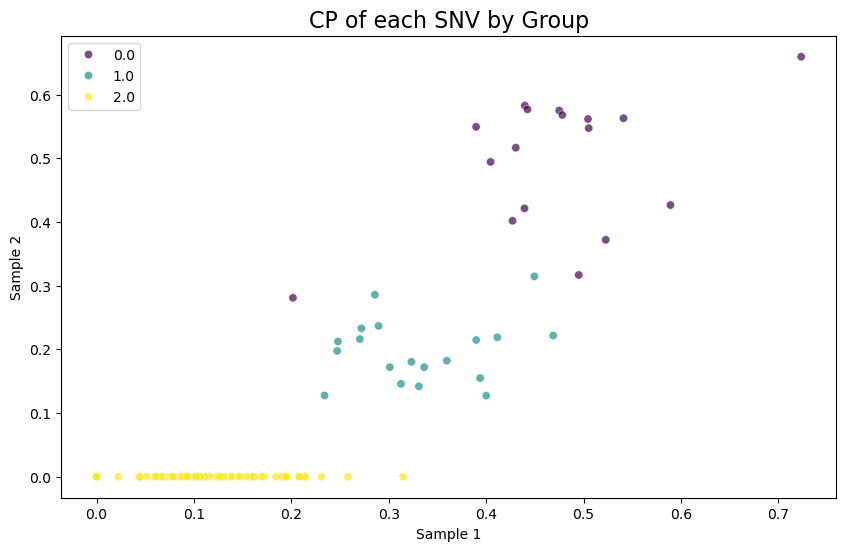

In [ ]:
from helper import *
c_mat = get_c_mat(df)
cp1 = convert_p_to_cp(res[0][0], n, m)
cparr = np.zeros([n, m])
group = np.zeros(n)
cp = df['tumour_purity'] * df['alt_counts'] * (df['tumour_purity'] * (df['major_cn'] + df['minor_cn']) + 2 * (1 - df['tumour_purity'])) / ((df['ref_counts'] + df['alt_counts']) * df['tumour_purity'] * df['multiplicity'])

for i in range(n):
    group[i] = int(df['cluster'][i * m])
    for j in range(m):
        cparr[i, j] = cp[i * m + j]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cparr[:, 0], y=cparr[:, 1], hue=group, palette='viridis', alpha=0.7)

# Add labels and title
plt.title("CP of each SNV by Group", fontsize=16)
plt.xlabel("Sample 1")
plt.ylabel("Sample 2")

# Show the plot
plt.show()

In [5]:
import pandas as pd
import numpy as np
from snv2 import *
df = pd.read_csv("simulation_data_cluster_3_region_2_read_depth_100_replica_2.tsv", sep="\t")

def get_b_mat1(df):
    n = len(np.unique(df.mutation))
    m = sum(df.mutation == np.unique(df.mutation)[0])
    res = np.zeros([n, m])
    tumor_cn_mat = get_tumor_cn_mat(df)
    normal_cn_mat = get_normal_cn_mat(df)
    purity_mat = get_purity_mat(df)
    major_cn_mat = get_major_cn(df)
    read_mat = get_read_mat(df)
    total_read_mat = get_total_read_mat(df)
    
    for i in range(n):
        for j in range(m):
            index = i * m + j
            res[i, j] = df.iloc[index , :].multiplicity
    
    # for i in range(n):
    #     for j in range(m):
    #         temp = read_mat[i, j] * (purity_mat[i, j] * tumor_cn_mat[i, j] + normal_cn_mat[i, j] * (1 - purity_mat[i, j]))\
    #             / (total_read_mat[i, j] * purity_mat[i, j])
    #         temp = 1 if np.round(temp) == 0 else np.round(temp)
    #         res[i, j] = np.min([temp, major_cn_mat[i, j]])
    return res


def get_b_mat2(df):
    n = len(np.unique(df.mutation))
    m = sum(df.mutation == np.unique(df.mutation)[0])
    res = np.zeros([n, m])
    tumor_cn_mat = get_tumor_cn_mat(df)
    normal_cn_mat = get_normal_cn_mat(df)
    purity_mat = get_purity_mat(df)
    major_cn_mat = get_major_cn(df)
    read_mat = get_read_mat(df)
    total_read_mat = get_total_read_mat(df)
    for i in range(n):
        for j in range(m):
            temp = read_mat[i, j] * (purity_mat[i, j] * tumor_cn_mat[i, j] + normal_cn_mat[i, j] * (1 - purity_mat[i, j]))\
                / (total_read_mat[i, j] * purity_mat[i, j])
            temp = 1 if np.round(temp) == 0 else np.round(temp)
            res[i, j] = np.min([temp, major_cn_mat[i, j]])
    return res


b_mat1 = np.reshape(get_b_mat1(df), (-1, 1))
b_mat2 = np.reshape(get_b_mat2(df), (-1, 1))

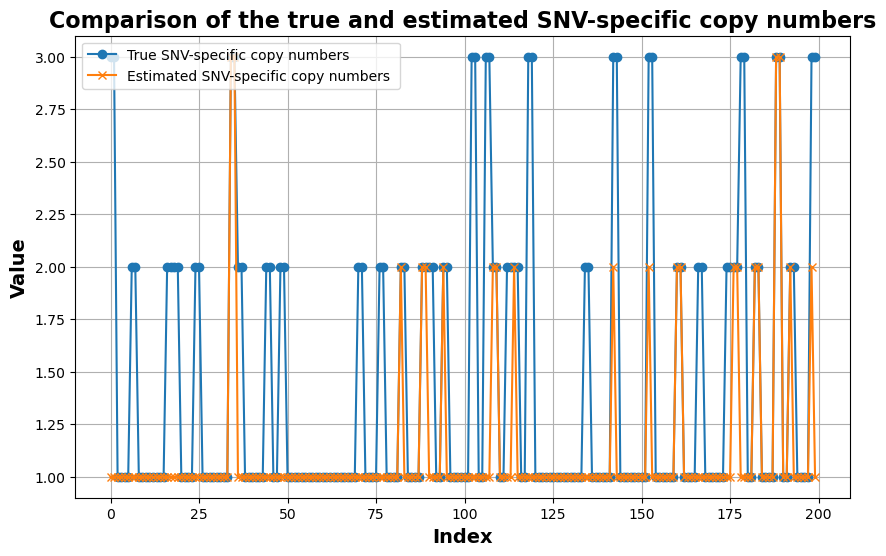

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(b_mat1, label='True SNV-specific copy numbers ', marker='o')
plt.plot(b_mat2, label='Estimated SNV-specific copy numbers ', marker='x')

plt.xlabel('Index', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.title('Comparison of the true and estimated SNV-specific copy numbers', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()